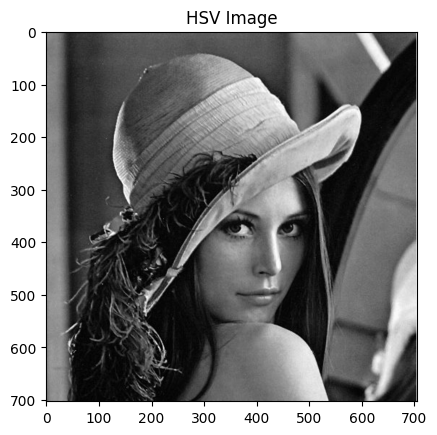

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/actress.png")
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display the HSV image
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))
plt.title("HSV Image")
plt.show()

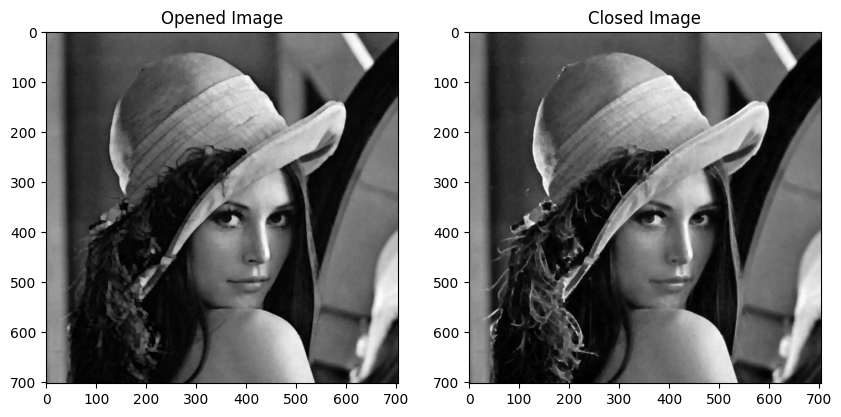

In [ ]:
# Convert to grayscale for morphological operations
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define kernel for morphology operations
kernel = np.ones((5,5), np.uint8)

# Apply morphological operations
opened = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(opened, cmap='gray'), plt.title('Opened Image')
plt.subplot(1,2,2), plt.imshow(closed, cmap='gray'), plt.title('Closed Image')
plt.show()


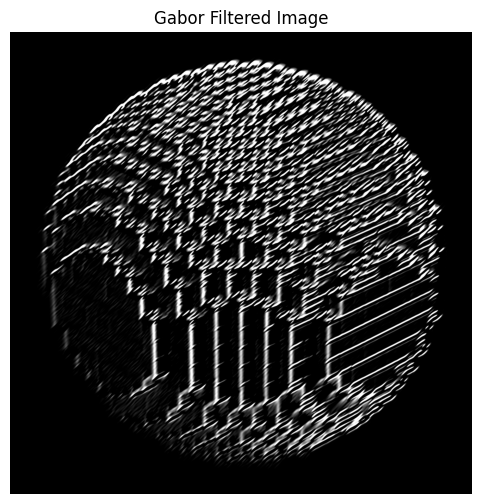

In [ ]:

def apply_gabor_filter(image, ksize=31, sigma=4.0, theta=np.pi/4, lambd=10.0, gamma=0.5):
    """Applies a Gabor filter to an image."""
    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, ktype=cv2.CV_32F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor_kernel)
    return filtered_image

# Load the image in grayscale
image_path = "/content/gabor.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise ValueError("Error: Image not found. Please check the path.")

# Apply Gabor filter
gabor_result = apply_gabor_filter(image)

# Display result
plt.figure(figsize=(6, 6))
plt.imshow(gabor_result, cmap='gray')
plt.title("Gabor Filtered Image")
plt.axis('off')
plt.show()


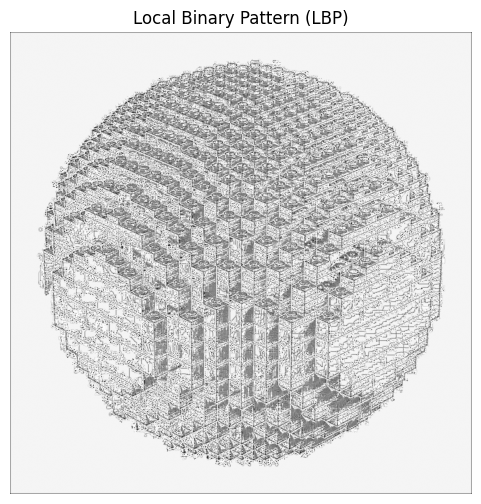

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Load the image in grayscale
image_path = "/content/gabor.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise ValueError("Error: Image not found. Please check the path.")

# Define LBP parameters
radius = 3  # Defines the neighborhood radius
n_points = 8 * radius  # Number of points in the circular neighborhood

# Apply LBP
lbp = local_binary_pattern(image, n_points, radius, method="uniform")

# Display result
plt.figure(figsize=(6, 6))
plt.imshow(lbp, cmap="gray")
plt.title("Local Binary Pattern (LBP)")
plt.axis("off")  # Remove axis for better visualization
plt.show()


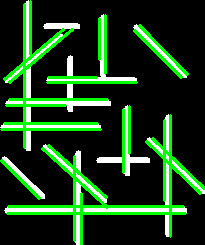

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/linedetection.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, threshold1=50, threshold2=150, apertureSize=3)

# Use Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=10, maxLineGap=10)

# Draw the detected lines on the original image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Save the output image
output_filename = 'Detected_Lines.png'
cv2.imwrite(output_filename, image)

# Display the output image (For Google Colab)
try:
    from google.colab.patches import cv2_imshow
    from google.colab import files
    cv2_imshow(image)  # Show image in Colab
    files.download(output_filename)  # Download output image
except ImportError:
    # Display image locally
    cv2.imshow("Detected Lines", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


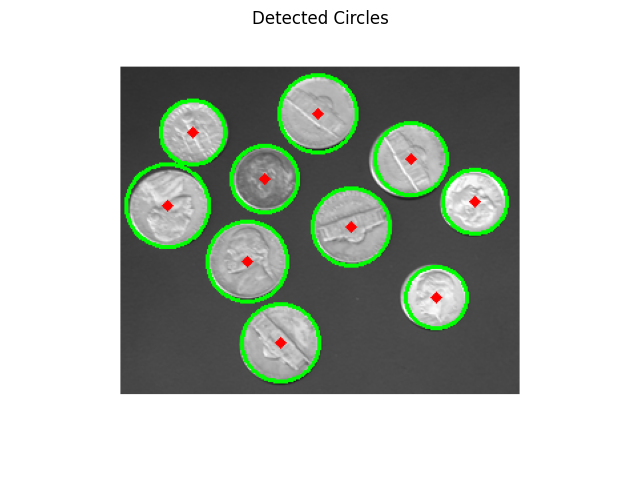

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/DetectEdgesInImages.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                           param1=50, param2=30, minRadius=10, maxRadius=50)

# If circles are detected
if circles is not None:
    circles = np.uint16(np.around(circles))  # Convert to integer values
    for circle in circles[0, :]:
        x, y, r = circle  # Extract center (x, y) and radius (r)
        cv2.circle(image, (x, y), r, (0, 255, 0), 2)  # Draw circle in green
        cv2.circle(image, (x, y), 2, (0, 0, 255), 3)  # Draw center in red

# Save the output image
cv2.imwrite('DetectedCircles.png', image)

# Convert BGR to RGB for correct color display in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the output image using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Detected Circles")
plt.show()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


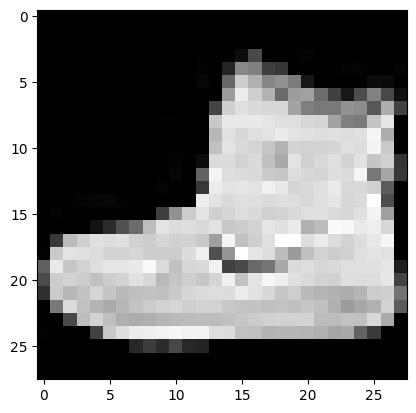

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.7753 - loss: 0.6179
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.8830 - loss: 0.3121
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9033 - loss: 0.2591
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9173 - loss: 0.2232
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9280 - loss: 0.1937
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9345 - loss: 0.1739
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9448 - loss: 0.1490
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9499 - loss: 0.1333
Epoch 9/50
 654/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9608 - loss: 0.1098

In [ ]:
from tensorflow.keras.datasets import fashion_mnist, cifar100
import matplotlib.pyplot as plt

# Load Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Load CIFAR-100
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar100.load_data()

# Show some sample images
plt.imshow(X_train[0], cmap="gray")
plt.show()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Normalize and add channel dimension
X_train_norm = X_train[..., None] / 255.0
X_test_norm = X_test[..., None] / 255.0

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train_norm, y_train, epochs=50, batch_size=32)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate predictions for the test set
y_pred_prob = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))